# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print('Beginning Data Retrieval\n-----------------------------\n')

weather_list = []
rcd = 0
sets = 1
for city in cities:
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
        
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    weather = requests.get(url).json()
    
    try:
        weather_list.append({
            'city': city,
            'lat': weather['coord']['lat'],
            'lng': weather['coord']['lon'],
            'temp': weather['main']['temp_max'],
            'humidity': weather['main']['humidity'],
            'wind':weather['wind']['speed'],
            'cloudiness':weather['clouds']['all'],
            'country':weather['sys']['country'],
            'date':weather['dt']
        })
        
    except:
        print('City not found. Skipping...')
        pass
        
print('-----------------------------\nData Retrieval Complete\n-----------------------------')
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | tala
Processing Record 4 of Set 1 | zhigansk
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | padang
Processing Record 9 of Set 1 | ucluelet
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mogadishu
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | jacareacanga
Processing Record 17 of Set 1 | plymouth
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | laela
Processing Record 41 of Set 4 | karaul
City not found. Skipping...
Processing Record 42 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 43 of Set 4 | tessalit
Processing Record 44 of Set 4 | yuxia
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | morrinhos
Processing Record 47 of Set 4 | ponta delgada
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | alice springs
Processing Record 50 of Set 4 | kjollefjord
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | otane
Processing Record 3 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 5 | zasheyek
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | tsurib
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | shatsk
Processing Record 10 of Set 5 | yeppoon
Processing Record 11 of Set 5 | pangoa
Proc

City not found. Skipping...
Processing Record 30 of Set 8 | obo
Processing Record 31 of Set 8 | kruisfontein
Processing Record 32 of Set 8 | korla
Processing Record 33 of Set 8 | hobyo
Processing Record 34 of Set 8 | umm lajj
Processing Record 35 of Set 8 | korfovskiy
Processing Record 36 of Set 8 | abu samrah
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | tigil
Processing Record 39 of Set 8 | klaebu
Processing Record 40 of Set 8 | ixtapa
Processing Record 41 of Set 8 | deputatskiy
Processing Record 42 of Set 8 | polunochnoye
Processing Record 43 of Set 8 | paradwip
City not found. Skipping...
Processing Record 44 of Set 8 | pokhara
Processing Record 45 of Set 8 | presidente medici
Processing Record 46 of Set 8 | mnogovershinnyy
Processing Record 47 of Set 8 | culipapa
City not found. Skipping...
Processing Record 48 of Set 8 | sokoni
Processing Record 49 of Set 8 | severo-kurilsk
Processing Record 50 of Set 8 | carutapera
Processing Record 1 of Set 9 | za

Processing Record 17 of Set 12 | tura
Processing Record 18 of Set 12 | palkino
Processing Record 19 of Set 12 | x-can
City not found. Skipping...
Processing Record 20 of Set 12 | beloha
Processing Record 21 of Set 12 | ambovombe
Processing Record 22 of Set 12 | bulaevo
Processing Record 23 of Set 12 | makung
City not found. Skipping...
Processing Record 24 of Set 12 | smithers
Processing Record 25 of Set 12 | huallanca
Processing Record 26 of Set 12 | casas grandes
Processing Record 27 of Set 12 | sembe
Processing Record 28 of Set 12 | rapid valley
Processing Record 29 of Set 12 | dzilam gonzalez
Processing Record 30 of Set 12 | prince rupert
Processing Record 31 of Set 12 | san vicente
Processing Record 32 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 33 of Set 12 | mudigere
Processing Record 34 of Set 12 | maarianhamina
Processing Record 35 of Set 12 | durango
Processing Record 36 of Set 12 | cururupu
Processing Record 37 of Set 12 | san felipe
Processing Record 38 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame(weather_list)
city_data.date = city_data.date.map(time.ctime)
city_data.to_csv('city_data.csv')
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,busselton,-33.6500,115.3333,60.01,78,1.99,96,AU,Fri Apr 23 16:20:55 2021
1,tala,30.6803,30.9429,55.18,90,5.70,1,EG,Fri Apr 23 16:21:48 2021
2,zhigansk,66.7697,123.3711,14.40,85,3.83,64,RU,Fri Apr 23 16:21:48 2021
3,hobart,-42.8794,147.3294,54.00,71,12.66,40,AU,Fri Apr 23 16:20:45 2021
4,hermanus,-34.4187,19.2345,55.99,89,4.79,90,ZA,Fri Apr 23 16:21:49 2021


In [5]:
city_data.describe()

,lat,lng,temp,humidity,wind,cloudiness
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,21.734723,20.747669,59.295785,69.536155,8.029594,53.365079
std,33.113480,90.715126,19.612736,23.156214,5.355764,37.602379
min,-54.800000,-175.200000,3.400000,6.000000,0.470000,0.000000
25%,-6.327750,-62.425700,43.000000,58.000000,3.725000,18.500000
50%,26.184200,24.731400,61.000000,77.000000,6.910000,58.000000
75%,50.175200,101.433400,77.000000,87.000000,10.700000,90.000000
max,78.218600,179.316700,93.040000,100.000000,34.630000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
time.strftime('%x')

'04/23/21'

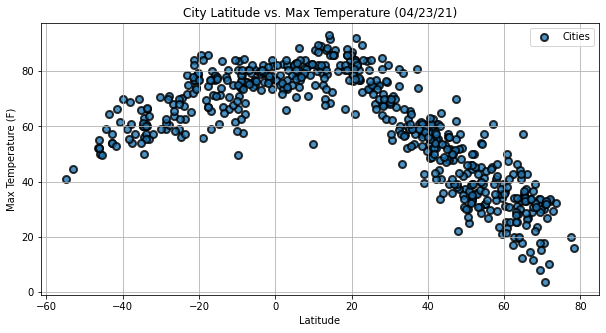

In [25]:
city_data.plot.scatter('lat','temp',edgecolor='black',alpha=0.8, linewidths=2, s=50, label='Cities',figsize=(10,5))
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

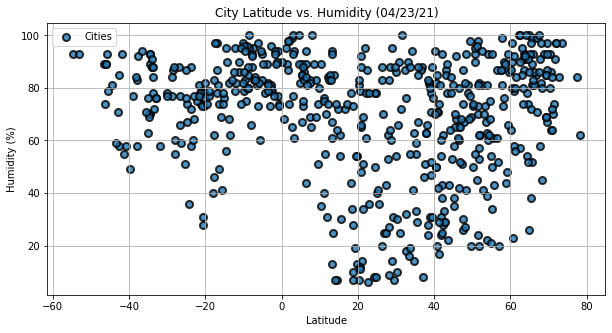

In [31]:
city_data.plot.scatter('lat','humidity',edgecolor='black',alpha=0.8, linewidths=2, s=50, label='Cities',figsize=(10,5))
plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

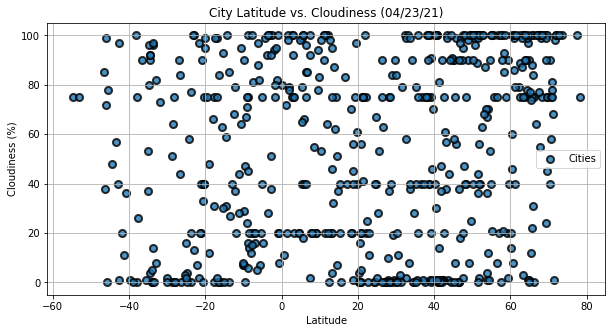

In [30]:
city_data.plot.scatter('lat','cloudiness',edgecolor='black',alpha=0.8, linewidths=2, s=50, label='Cities',figsize=(10,5))
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

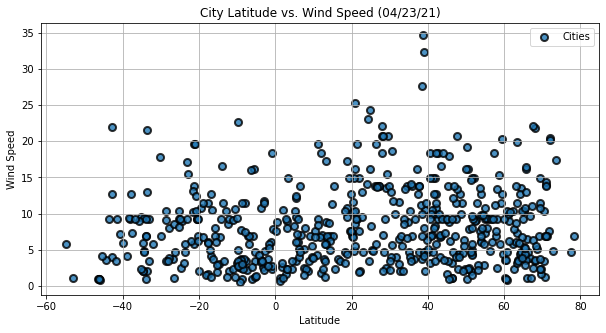

In [29]:
city_data.plot.scatter('lat','wind',edgecolor='black',alpha=0.8, linewidths=2, s=50, label='Cities',figsize=(10,5))
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

## Linear Regression

In [32]:
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,busselton,-33.6500,115.3333,60.01,78,1.99,96,AU,Fri Apr 23 16:20:55 2021
1,tala,30.6803,30.9429,55.18,90,5.70,1,EG,Fri Apr 23 16:21:48 2021
2,zhigansk,66.7697,123.3711,14.40,85,3.83,64,RU,Fri Apr 23 16:21:48 2021
3,hobart,-42.8794,147.3294,54.00,71,12.66,40,AU,Fri Apr 23 16:20:45 2021
4,hermanus,-34.4187,19.2345,55.99,89,4.79,90,ZA,Fri Apr 23 16:21:49 2021


In [35]:
x = city_data.lat

y = city_data.temp

In [37]:
linregress(x,y)

LinregressResult(slope=-0.38790999269738136, intercept=67.72690090778225, rvalue=-0.6549341110573118, pvalue=9.362364144561254e-71, stderr=0.018830007875086718)

In [38]:
def lineRegression(x,y,title):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress = x*slope+intercept
    msg = f'Y = {slope:.2f}X + {intercept:.2f}'
    plt.figure(figsize=[10,5])
    plt.scatter(x,y, edgecolor='black',alpha=0.8, linewidths=2, s=50, label='Cities')
    plt.plot(x,regress,'r')
    plt.annotate(msg,(x.min(),y.min()),fontsize=15,color='red')
    plt.title(f'Latitue VS {title}')
    plt.ylabel(f'{title}')
    plt.xlabel('Latitude')
    plt.show()
    

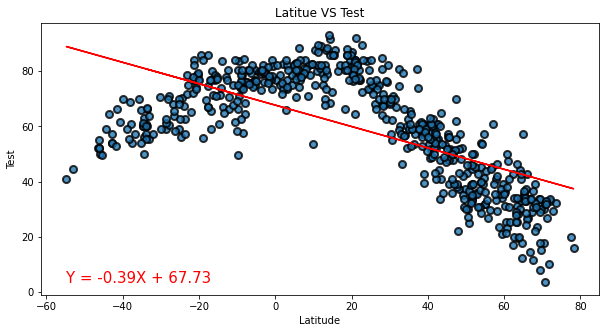

In [39]:
lineRegression(x,y,'Test')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


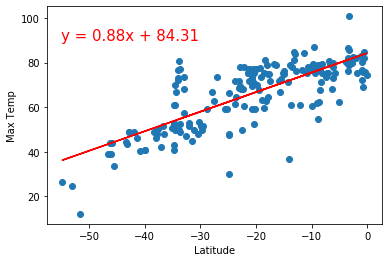

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


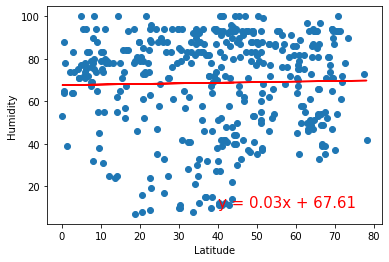

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


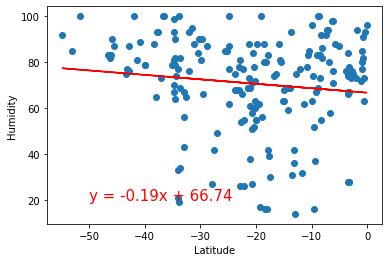

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


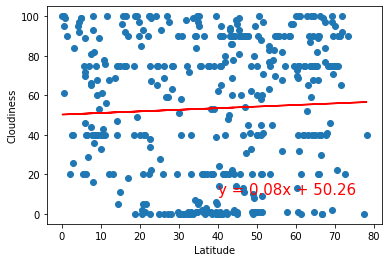

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


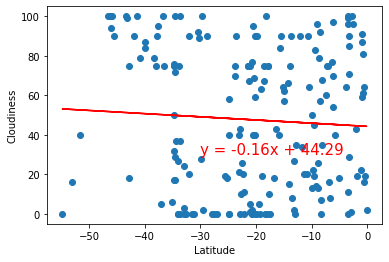

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


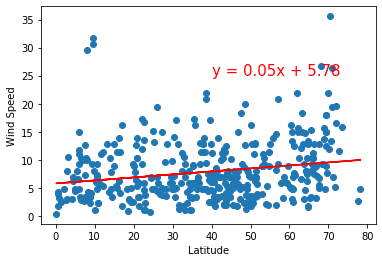

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


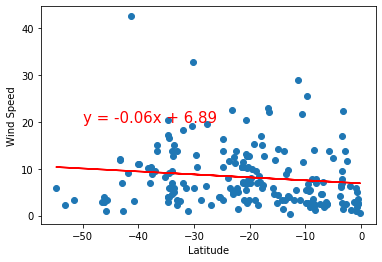